<a href="https://colab.research.google.com/github/Artenida/computer_vision_lessons/blob/main/Image_Filtering_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Statistical filters

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***Load test images***
Adding noise to images


1.   Gaussian noise - statistical, normal distribution (sensor noise)
2.   Salt and pepper noise - random white and black pixels (transmission noise)
3.   Poisson noise - related to image intensity (photon noise)
4.   Multiplicative noise - multiplicative noise (common in ultrasound images)

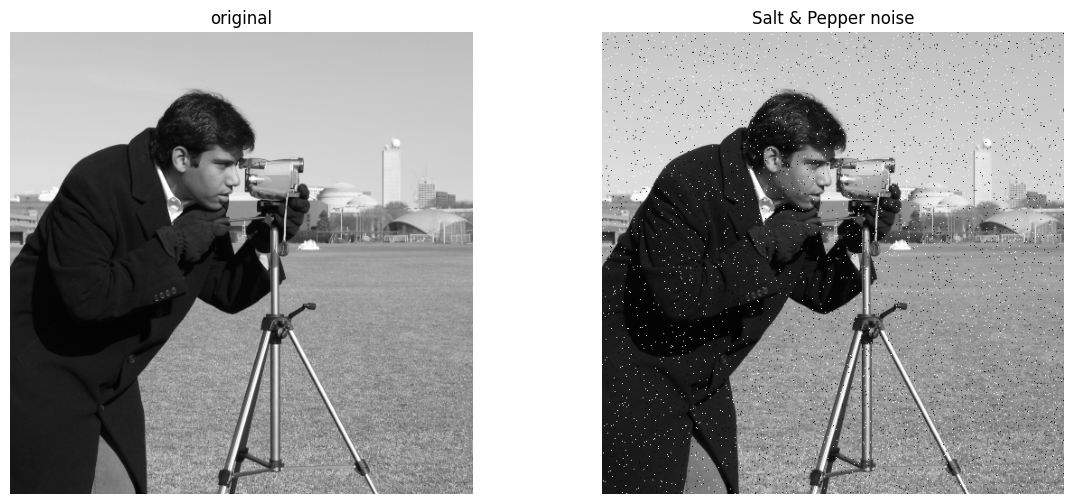

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage import img_as_ubyte

img = data.camera()

## Noisy image: Add some noise by randomly setting some pixels to 0 or 255 (salt and pepper noise)
noise = np.random.random(img.shape) # uniform random numbers between 0 and 1
noisy_image = img_as_ubyte(data.camera())
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.01] = 0

def plot_comparison(original, filtered, filter_name):
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,6), sharex = True,
                                sharey = True )
  ax1.imshow(original, cmap=plt.cm.gray)
  ax1.set_title('original')
  ax1.axis('off')
  ax2.imshow(filtered, cmap=plt.cm.gray)
  ax2.set_title(filter_name)
  ax2.axis('off')

plot_comparison(img, noisy_image, 'Salt & Pepper noise')
plt.savefig('Noisy.png')

**Median Filters**
A median filter is a non-linear filter used in image processing to remove noise, especially salt-and-pepper noise (random black and white pixels), while preserving edges better than a mean filter.

Creates a disk-shaped neighborhood of radius 5.
Applies median filtering: each pixel gets replaced by the median of the surrounding pixels within that disk

The radius is 25 pixels, meaning:
Much larger neighborhood.
More aggressive noise reduction, but also blurs more details.
Helps compare the effect of kernel size.

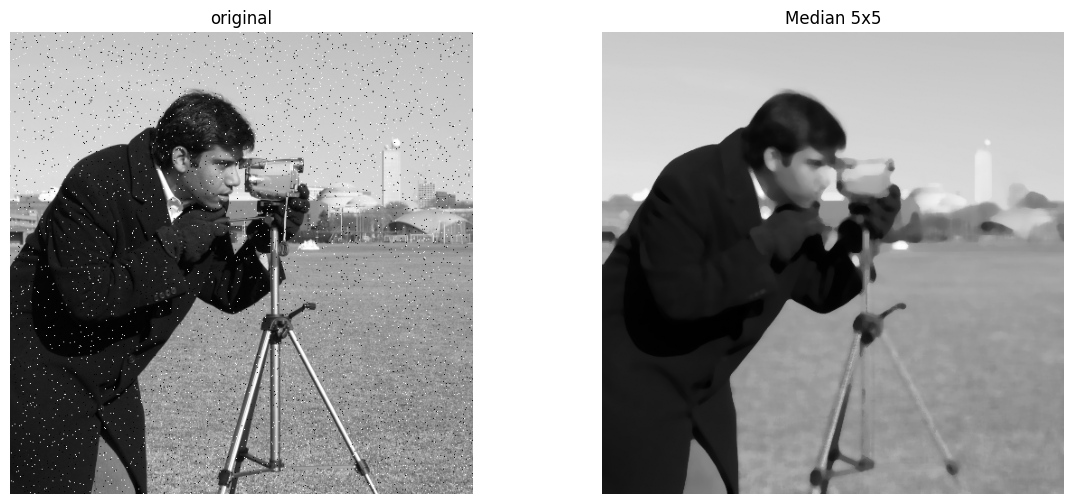

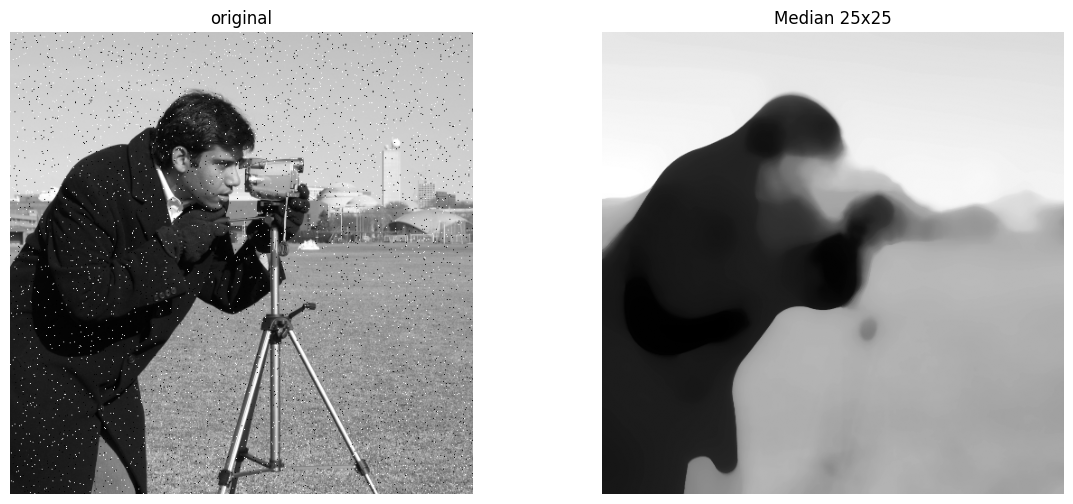

In [3]:
from skimage.morphology import disk # create a disk-shaped structuring element
from skimage.filters import median # the actual median filter function

img = img_as_ubyte(noisy_image) # ensure image is in 8-bit format (uint8), required by median
sel5 = disk(5) # Structuring element disk radius 5 pixels
img_med5x5 = median(img, sel5)
plot_comparison(img, img_med5x5, 'Median 5x5')
plt.savefig('median.png')

sel25 = disk(25)
img_med25x25 = median(img, sel25)
plot_comparison(img, img_med25x25, 'Median 25x25')

Local averaging filter:
Add Gaussian noise to the image:

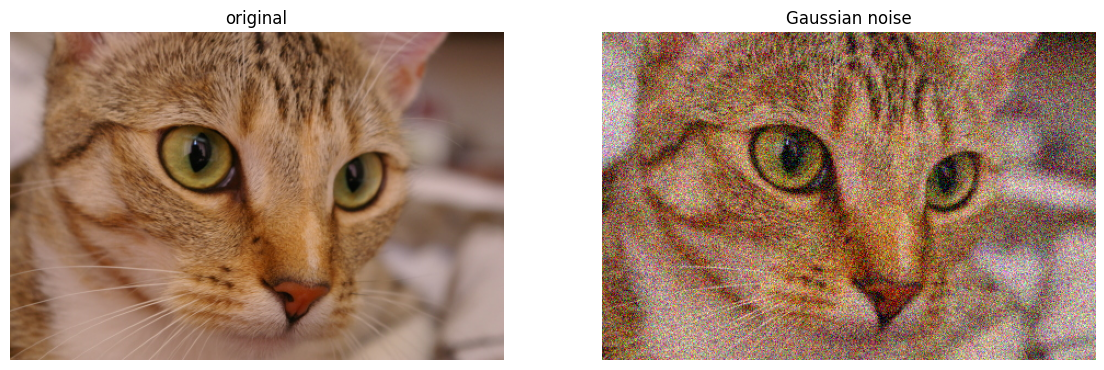

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage import img_as_ubyte

from skimage import data, img_as_float
from skimage.util import random_noise


img = img_as_float(data.chelsea())
sigma = 0.15
noisy_image_normal = random_noise(img, var=sigma**2)

plot_comparison(img,noisy_image_normal,'Gaussian noise')

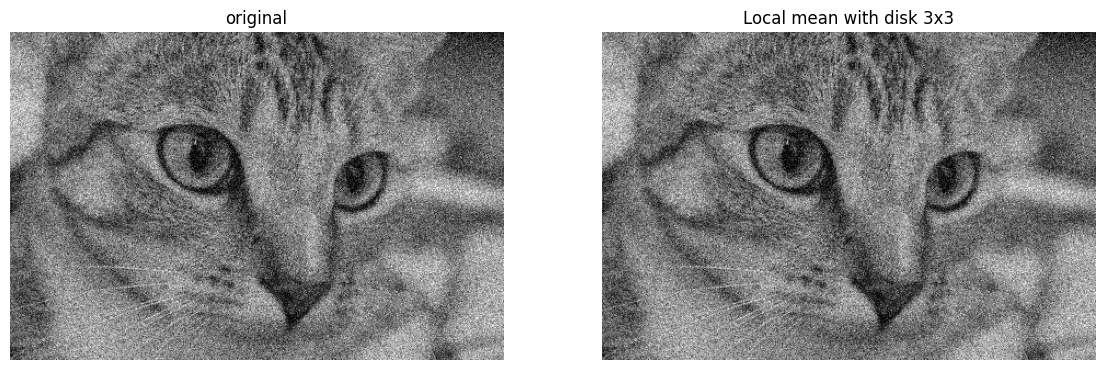

In [5]:
# Import the mean_bilateral function.
from skimage.filters.rank import mean_bilateral
from skimage.filters import rank
from skimage.color import rgb2gray

img = img_as_ubyte(rgb2gray(noisy_image_normal))

selem = disk(3) # structuring element

# Apply the mean_bilateral filter.
img_locmed = mean_bilateral(img, disk(3), s0=5, s1=5)

plot_comparison(img,img_locmed,'Local mean with disk 3x3')
plt.savefig('Local_mean.png')

**Morphological Filtering**
Erosion and dilation

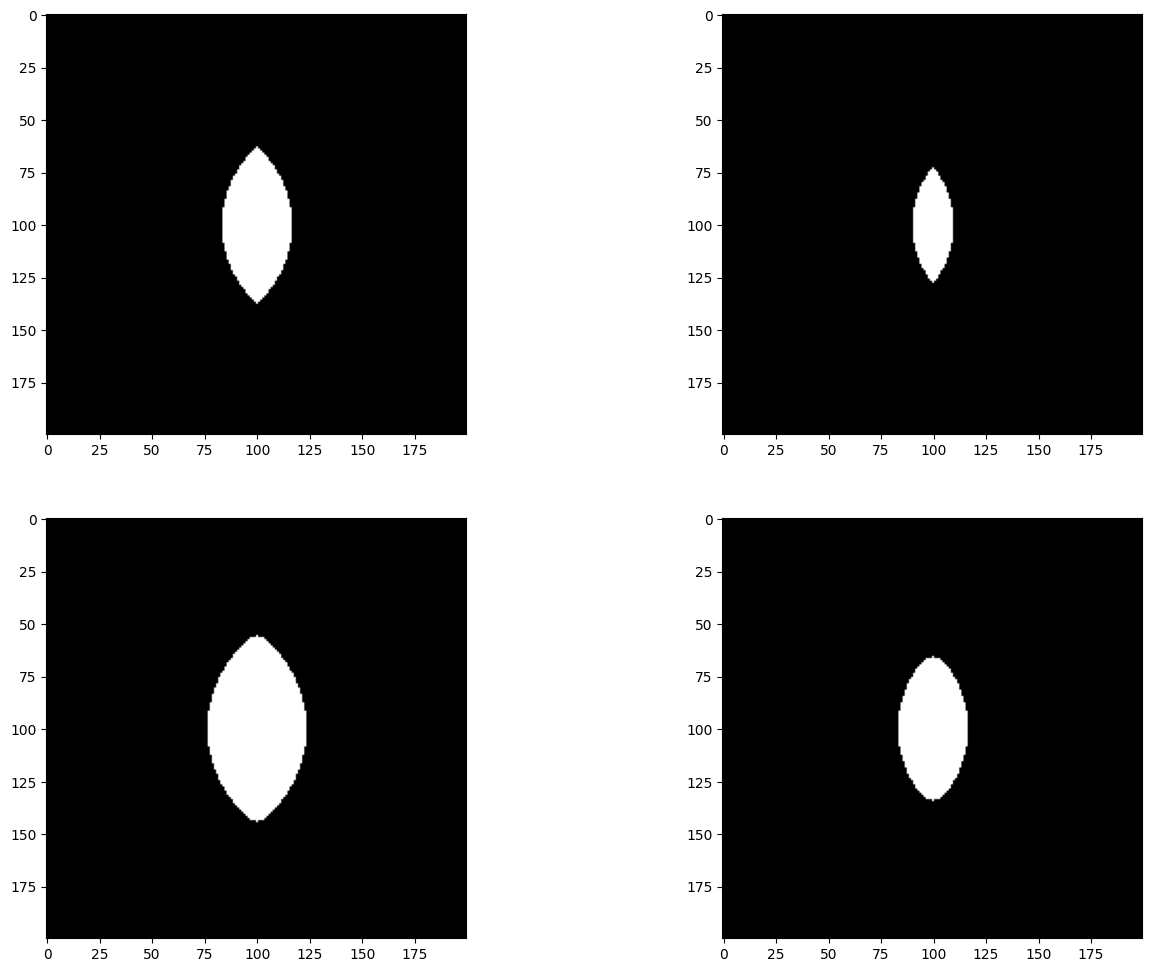

In [6]:
import numpy as np
import matplotlib.pyplot as plt


nrows, ncols = (200,200)
row, col = np.ogrid[:nrows, :ncols]
disk_diameter = 50

cnt_row1, cnt_col1 = nrows / 2, ncols / 3
outer_disk_mask1 = ((row - cnt_row1)**2 + (col - cnt_col1)**2 < (disk_diameter)**2)

cnt_row2, cnt_col2 = nrows / 2, 2*ncols / 3
outer_disk_mask2 = ((row - cnt_row2)**2 + (col - cnt_col2)**2 < (disk_diameter)**2)

# Intersection (logical AND):
I_and = outer_disk_mask1 & outer_disk_mask2

from skimage.morphology import erosion, dilation
from skimage.morphology import disk

selem = disk(7)
eroded = erosion(I_and, selem)
dilated = dilation(I_and, selem)
eroded_dilated = dilation(eroded, selem)


fig = plt.figure(figsize=(16, 12))
plt.subplot(221),plt.imshow(I_and, cmap = 'gray')
plt.subplot(222),plt.imshow(eroded, cmap = 'gray')
plt.subplot(223),plt.imshow(dilated, cmap = 'gray')
plt.subplot(224),plt.imshow(eroded_dilated, cmap = 'gray')


plt.show()

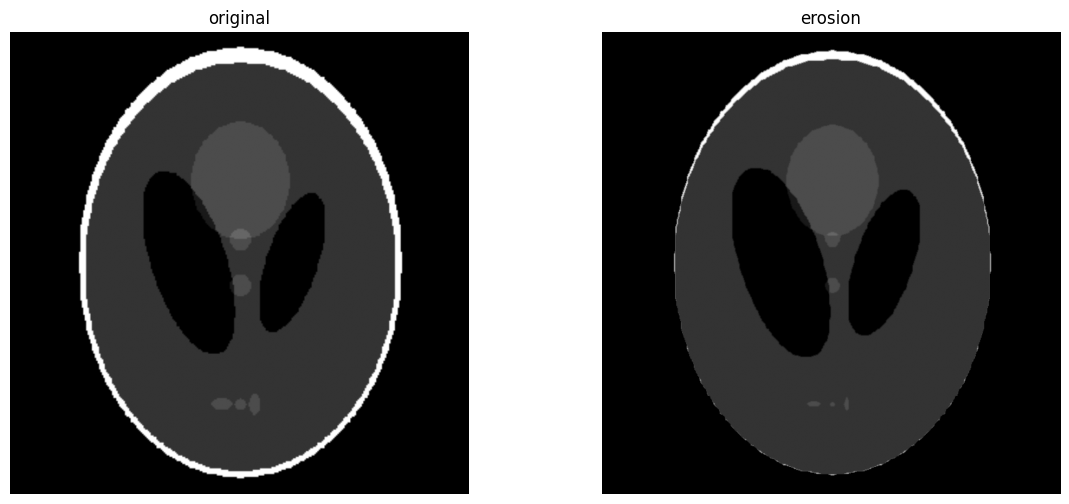

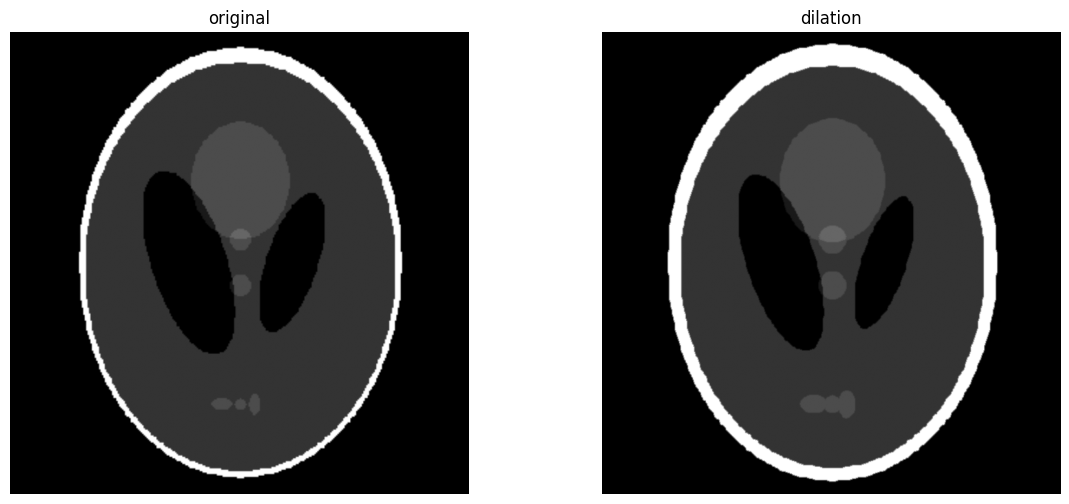

In [7]:
import os
import matplotlib.pyplot as plt
from skimage.data import data_dir
from skimage.util import img_as_ubyte
from skimage import io
from pathlib import Path

phantom_path = '/content/drive/MyDrive/Colab Notebooks/Images/phantom.png'
orig_phantom = img_as_ubyte(io.imread(phantom_path, as_gray=True))

from skimage.morphology import erosion, dilation
from skimage.morphology import disk

selem = disk(5)
eroded = erosion(orig_phantom, selem)
plot_comparison(orig_phantom, eroded, 'erosion')
plt.savefig('erosion.png')

dilated = dilation(orig_phantom, selem)
plot_comparison(orig_phantom, dilated, 'dilation')
plt.savefig('dilation.png')

Top-Hat morphological

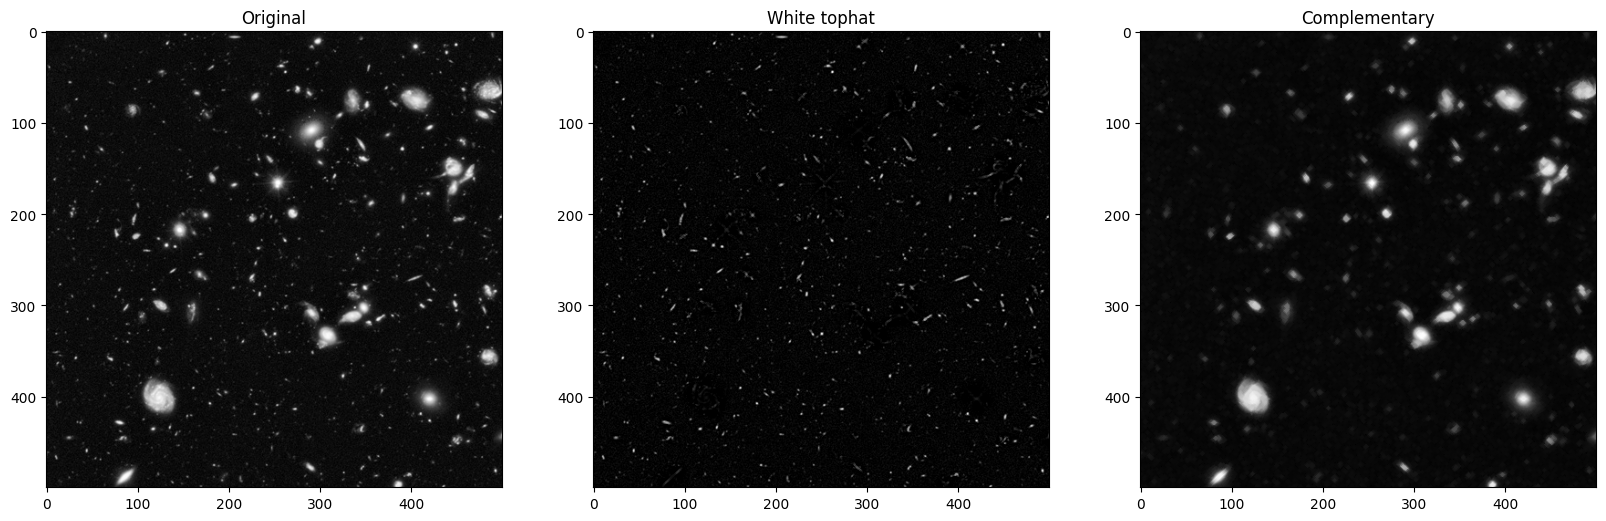

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import color, morphology

image = color.rgb2gray(data.hubble_deep_field())[:500, :500]

footprint = morphology.disk(2)
res = morphology.white_tophat(image, footprint)

fig, ax = plt.subplots(ncols=3, figsize=(20, 8))
ax[0].set_title('Original')
ax[0].imshow(image, cmap='gray')
ax[1].set_title('White tophat')
ax[1].imshow(res, cmap='gray')
ax[2].set_title('Complementary')
ax[2].imshow(image - res, cmap='gray')

plt.show()

**Spatial (convolutional) filters**
2D convolution

In [9]:
import numpy as np
I = np.array([[0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 1, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0]])
h = np.array([[1,2,3],[4,5,6],[7,8,9]])

from scipy import ndimage
Iconv = ndimage.convolve(I, h, mode='constant', cval=0.0)
Iconv

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 2, 3, 0, 0],
       [0, 0, 4, 5, 6, 0, 0],
       [0, 0, 7, 8, 9, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

Gaussian filters

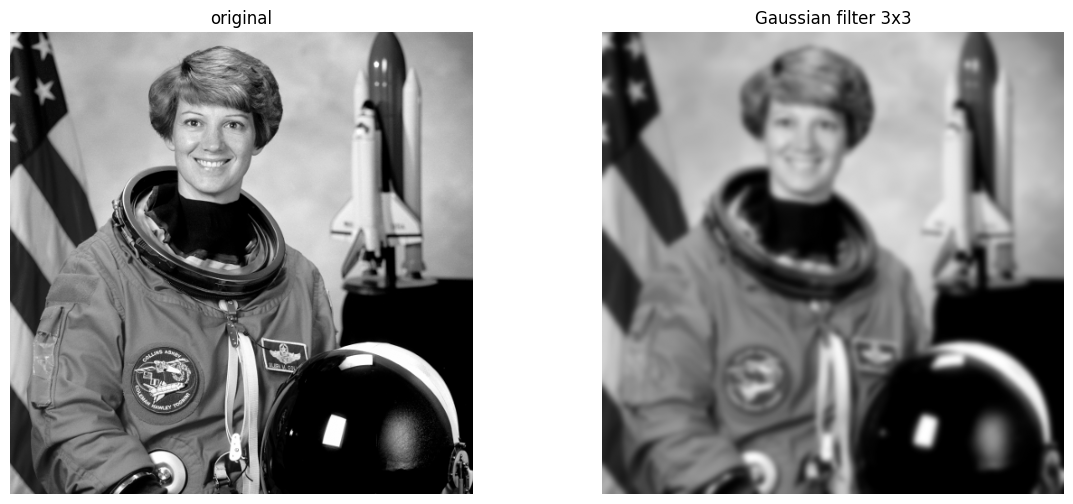

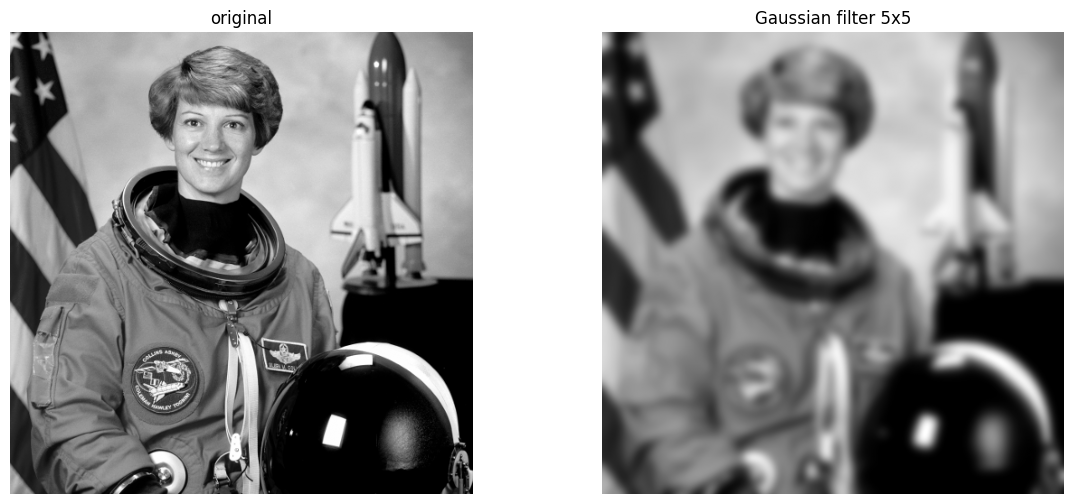

In [10]:
from skimage import data
from skimage.filters import gaussian
from skimage.color import rgb2gray

img = data.astronaut()
img = rgb2gray(img)

img_f = gaussian(img, 3)
plot_comparison(img,img_f, 'Gaussian filter 3x3')
plt.savefig('gaussian.png')


img_f = gaussian(img, 5)
plot_comparison(img,img_f, 'Gaussian filter 5x5')

Edge detection: Sobel and Roberts gradient operators

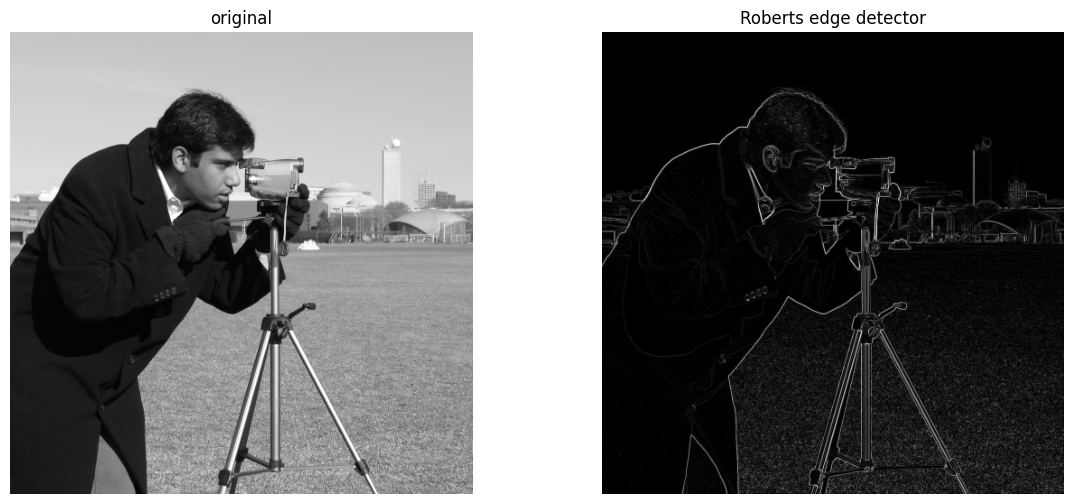

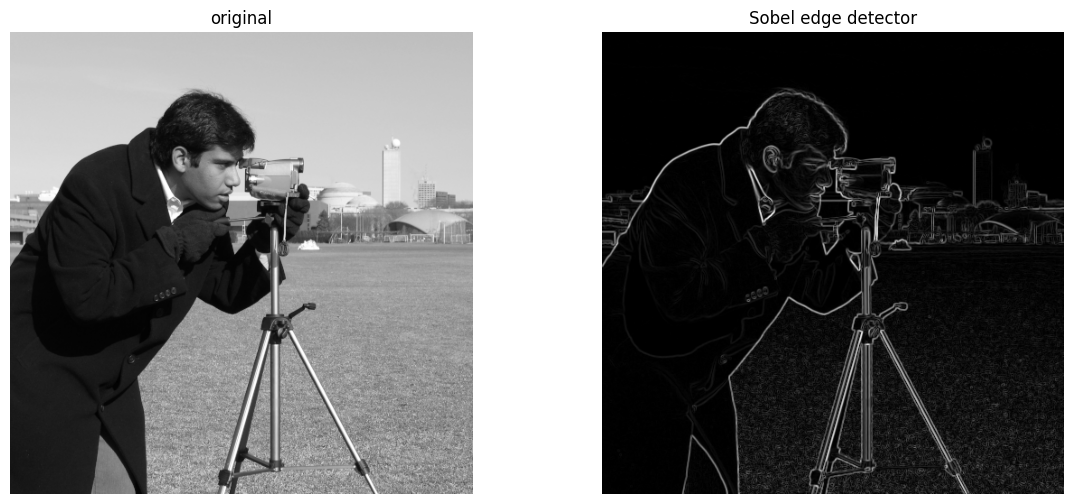

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import camera
from skimage.filters import roberts, sobel

image = camera()

edge_roberts = roberts(image)
plot_comparison(image,edge_roberts, 'Roberts edge detector')
plt.savefig('roberts_edges.png')


edge_sobel = sobel(image)
plot_comparison(image,edge_sobel, 'Sobel edge detector')

Enhancing contours: Laplacian filters

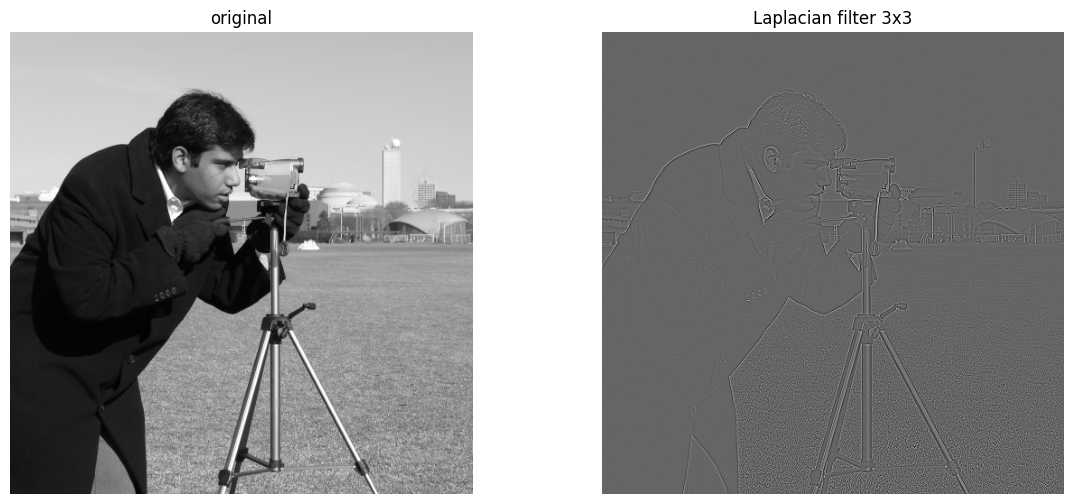

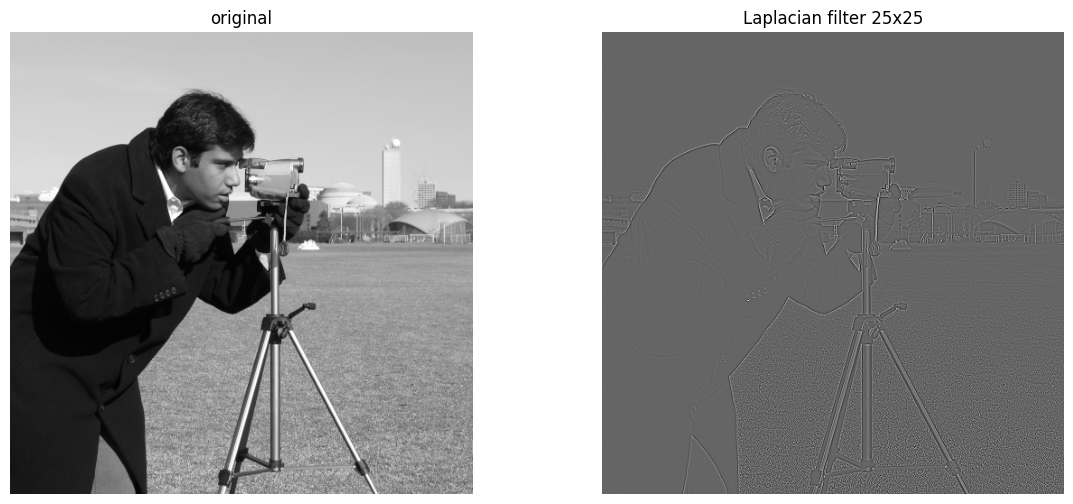

In [12]:
from skimage import data
from skimage.filters import laplace
from skimage.color import rgb2gray

img_f = laplace(image, 3)
plot_comparison(image,img_f, 'Laplacian filter 3x3')
plt.savefig('laplacian.png')


img_f = laplace(image, 25)
plot_comparison(image,img_f, 'Laplacian filter 25x25')

Filtering in the frequency domain

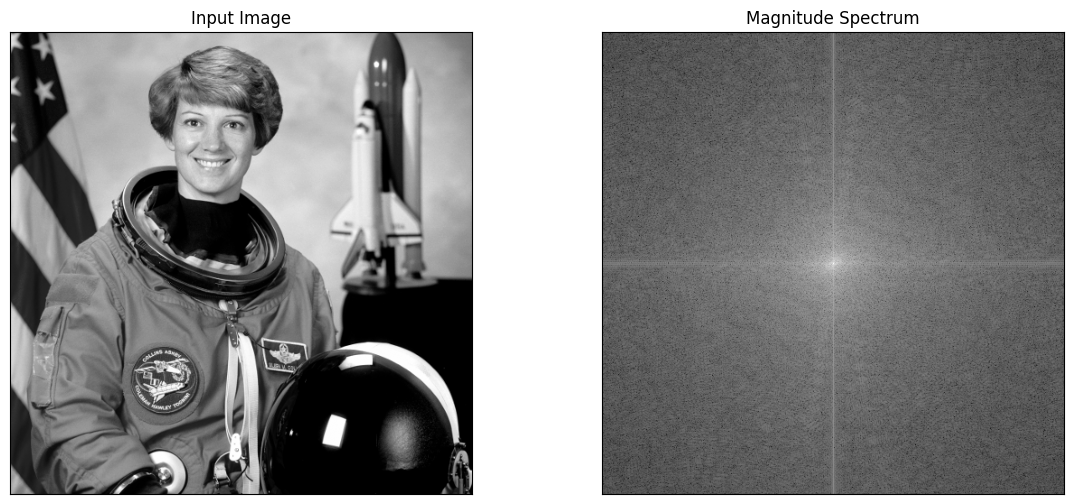

In [13]:
import numpy as np
from skimage import data
from skimage.color import rgb2gray
from matplotlib import pyplot as plt

img = data.astronaut()
img = rgb2gray(img)


f = np.fft.fft2(img) # Discrete Fourier Transform using FFT algorithm
fshift = np.fft.fftshift(f) # Shift to have zero frequency (origin) at the center of the image
magnitude_spectrum = 20*np.log(np.abs(fshift)) # Logarithmic scale for better visualization of the differences in powert spectrum

fig = plt.figure(figsize=(14, 6))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.savefig('frequency.png')
plt.show()

High-pass filter

In [14]:
rows, cols = img.shape
crow,ccol = np.int(rows/2) , np.int(cols/2)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plot_comparison(img,img_back, 'High-pass filter in the frequency domain')

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

Low-pass filter

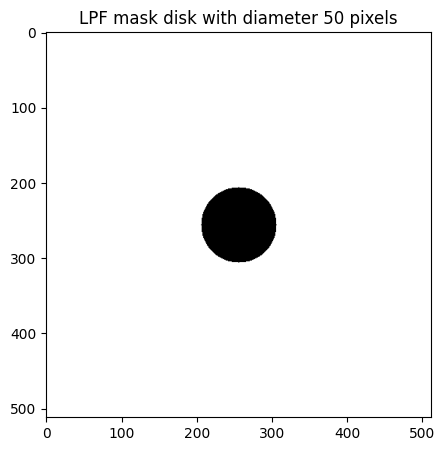

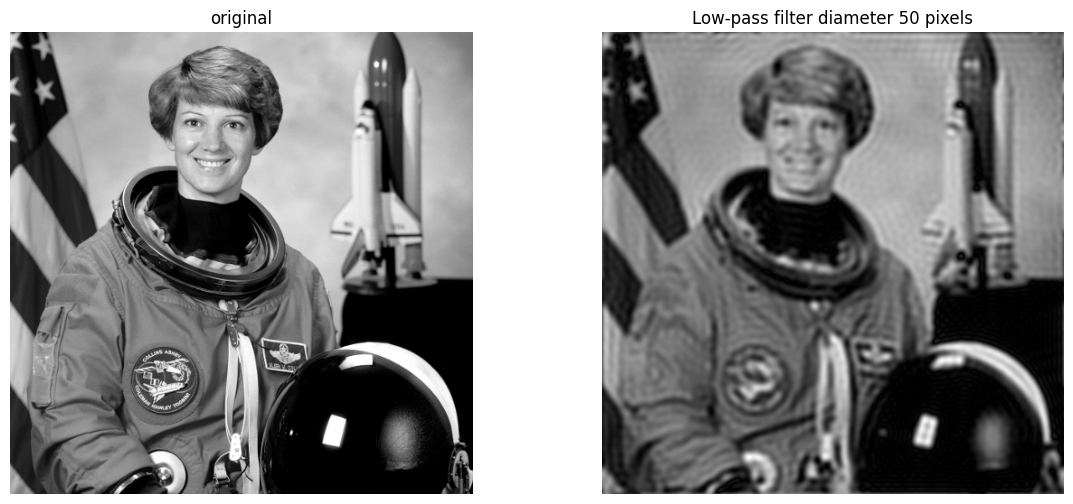

In [15]:
nrows, ncols = img.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
disk_diameter = 50
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (disk_diameter)**2)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

fshift[outer_disk_mask] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

fig = plt.figure(figsize=(5,5))
plt.imshow(outer_disk_mask,cmap=plt.cm.gray)
plt.title('LPF mask disk with diameter {} pixels'.format(disk_diameter))
plt.show()

plot_comparison(img,img_back, 'Low-pass filter diameter {} pixels'.format(disk_diameter))

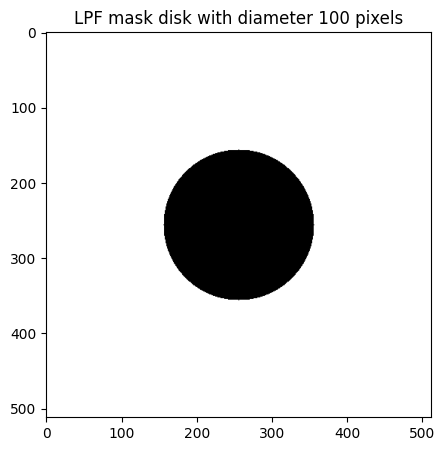

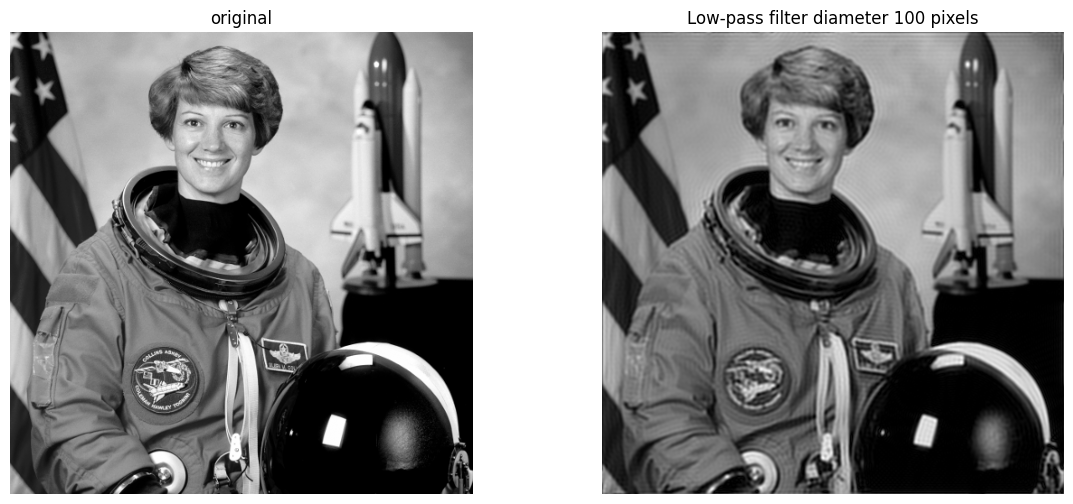

In [16]:
disk_diameter = 100
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (disk_diameter)**2)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

fshift[outer_disk_mask] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

fig = plt.figure(figsize=(5,5))
plt.imshow(outer_disk_mask,cmap=plt.cm.gray)
plt.title('LPF mask disk with diameter {} pixels'.format(disk_diameter))
plt.show()
plot_comparison(img,img_back, 'Low-pass filter diameter {} pixels'.format(disk_diameter))